<a href="https://colab.research.google.com/github/daniolivaglez/03MAIR-Algoritmos-De-Optimizacion/blob/main/trabajoseminario/Daniel_Oliva_Trabajo_Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Seminario
Nombre: Daniel Oliva González <br>
Link: https://colab.research.google.com/drive/1MzDkoaEja8u2KS1MnmOYA43dQCRtvnwO?usp=sharing
<br>
GitHub: https://github.com/daniolivaglez/03MAIR-Algoritmos-De-Optimizacion/blob/main/trabajoseminario/Daniel_Oliva_Trabajo_Seminario.ipynb


Se va a empezar con una breve descripción del problema. El objetivo es organizar una jornada de la liga de fútbol con el fin de poder conseguir la mayor audiencia posible. Según los horarios dados, hay 10 franjas para poder disputar los 10 partidos de la jornada. Puesto que se quiere tener la máxima audiencia, pienso que la técnica más acorde sería un **enfoque voraz**, de tal manera que los partidos que más audiencia atraigan sean los que se disputen en las mejores franjas horarias en cuanto a público se refiere.
El primer paso a realizar será cargar las librerías que van a ir haciendo falta en la resolución del problema.

In [1]:
import numpy as np
import pandas as pd
import operator

A continuación, se va a crear un dataframe en el que haya una columna con el horario del partido y otra con la ponderación a la audiencia. Siendo el primer valor el correspondiente con el primer horario a las 20h del viernes y siendo el último valor las 20h del lunes.
Se ha escogido un **dataframe**, puesto que es una estructura de datos muy flexible y fácil de manejar conforme se vayan incluyendo partidos.

In [2]:
ponderacion = np.array([['20h viernes','12h sábado','16h sábado','18h sábado','20h sábado','12h sábado','16h domingo','18h domingo','20h domingo','20h lunes'],[0.4, 0.55, 0.7, 0.8, 1, 0.45, 0.75, 0.5, 1, 0.4]])
dataframe_partidos = pd.DataFrame(ponderacion[1], index=ponderacion[0])
dataframe_partidos.columns = ['Ponderación_audiencia']
dataframe_partidos

,Ponderación_audiencia
20h viernes,0.4
12h sábado,0.55
16h sábado,0.7
18h sábado,0.8
20h sábado,1
12h sábado,0.45
16h domingo,0.75
18h domingo,0.5
20h domingo,1
20h lunes,0.4


Ahora se creará una matriz que indicará la audiencia siendo el valor 0 de filas y columnas un equipo A, el valor 1 un equipo B y el valor 2 un equipo de categoría C.

In [3]:
audiencia_partidos = np.array([[2,1.3,1],
              [None,0.9,0.75],
              [None,None,0.47]])
print(pd.DataFrame(audiencia_partidos))

      0     1     2
0     2   1.3     1
1  None   0.9  0.75
2  None  None  0.47


Respecto a la coincidencia o no de partidos, según los datos dados para cuando varios partidos coincidan y al haber 10 franjas, una para cada partido, poner partidos a la misma hora solo va a producir una pérdida de público, por lo que no se tendrá en cuenta.

Ahora se creará un diccionario con cada equipo y su correspondiente categoría. Para la categoría del equipo se fijará en la clasificación de la temporada anterior, siendo los 4 primeros categoría A, del 5º al 11º serán categoría B y los restantes y los recién ascendidos serán categoría C. Además, los equipos descendidos no se tendrán en cuenta en el diccionario.
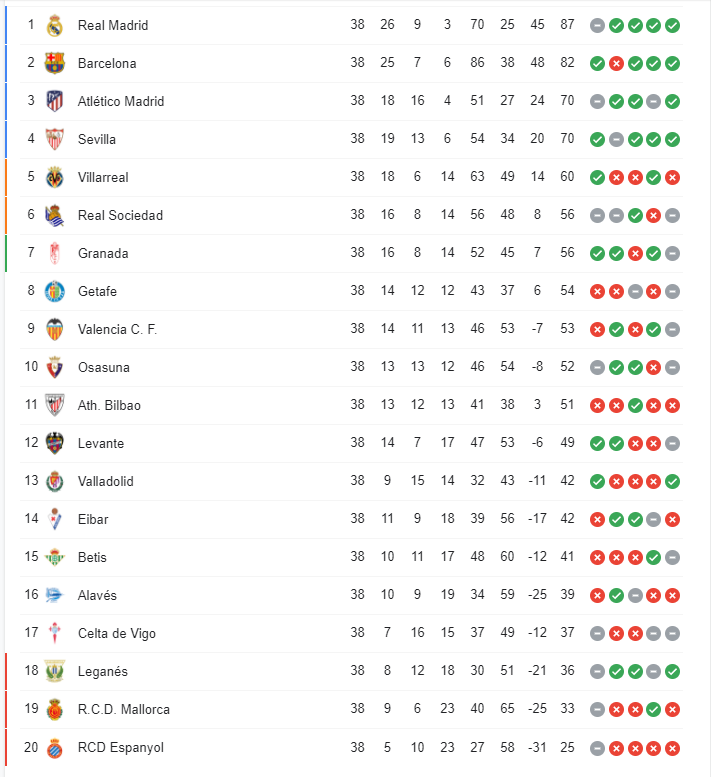

In [5]:
diccionario_equipo_categoria = {'R.MADRID':'A',
    'BARCELONA':'A',
    'ATLÉTICO':'A',
    'SEVILLA':'A',
    'VILLARREAL':'B',
    'R.SOCIEDAD':'B',
    'GRANADA':'B',
    'GETAFE':'B',
    'VALENCIA':'B',
    'OSASUNA':'B',
    'ATHLETIC':'B',
    'LEVANTE':'C',
    'VALLADOLID':'C',
    'EIBAR':'C',
    'BETIS':'C',
    'ALAVÉS':'C',
    'CELTA':'C',
    'HUESCA':'C',
    'CÁDIZ':'C',
    'ELCHE':'C'}

Ahora se creará una función auxiliar que se encargue de, para un partido dado, devolver la audiencia para ese partido. Lo que se hará será dividir el string introducido en los dos equipos y se buscará la categoría correspondiente a cada equipo, devolviendo siempre la categoría mejor en primer lugar.

In [6]:
prueba = 'athletic-granada'
def categoriaPartido(partido, diccionario):
  partido = partido.upper()
  pos = partido.find('-')
  equipo1 = partido[0:pos]
  equipo2 = partido[(pos+1):len(partido)]
  categoria1 = diccionario[equipo1]
  categoria2 = diccionario[equipo2]
  if categoria1=='A':
    resultado = categoria1+categoria2
  elif categoria2=='A':
    resultado = categoria2+categoria1
  elif categoria1=='B' and categoria2!='A':
    resultado = categoria1+categoria2
  elif categoria2=='B' and categoria1!='A':
    resultado = categoria2+categoria1
  else:
    resultado = categoria1+categoria2
  return resultado
categoriaPartido(prueba,diccionario_equipo_categoria)

'BB'

También, para una categoría de partido dada se devolverá la correspondiente audiencia. Según la categoría del partido, se buscará en la matriz de audiencia el valor correspondiente.

In [7]:
def audienciaCategoriaPartido(categoria, audiencia):
  if categoria == 'AA':
    res = audiencia[0,0]
  elif categoria == 'AB':
    res = audiencia[0,1]
  elif categoria == 'AC':
    res = audiencia[0,2]
  elif categoria == 'BB':
    res = audiencia[1,1]
  elif categoria == 'BC':
    res = audiencia[1,2]
  else:
    res = audiencia[2,2]
  return res
audienciaCategoriaPartido(categoriaPartido(prueba,diccionario_equipo_categoria), audiencia_partidos)

0.9

Para la realización de nuestro algoritmo y probarlo se ha escogido la jornada 26 de esta edición de la liga. En ella se puede observar que todos los partidos tienen la misma fecha y hora, puesto que no tienen todavía el horario asignado. El siguiente paso, será la creación de la lista con los diferentes partidos.

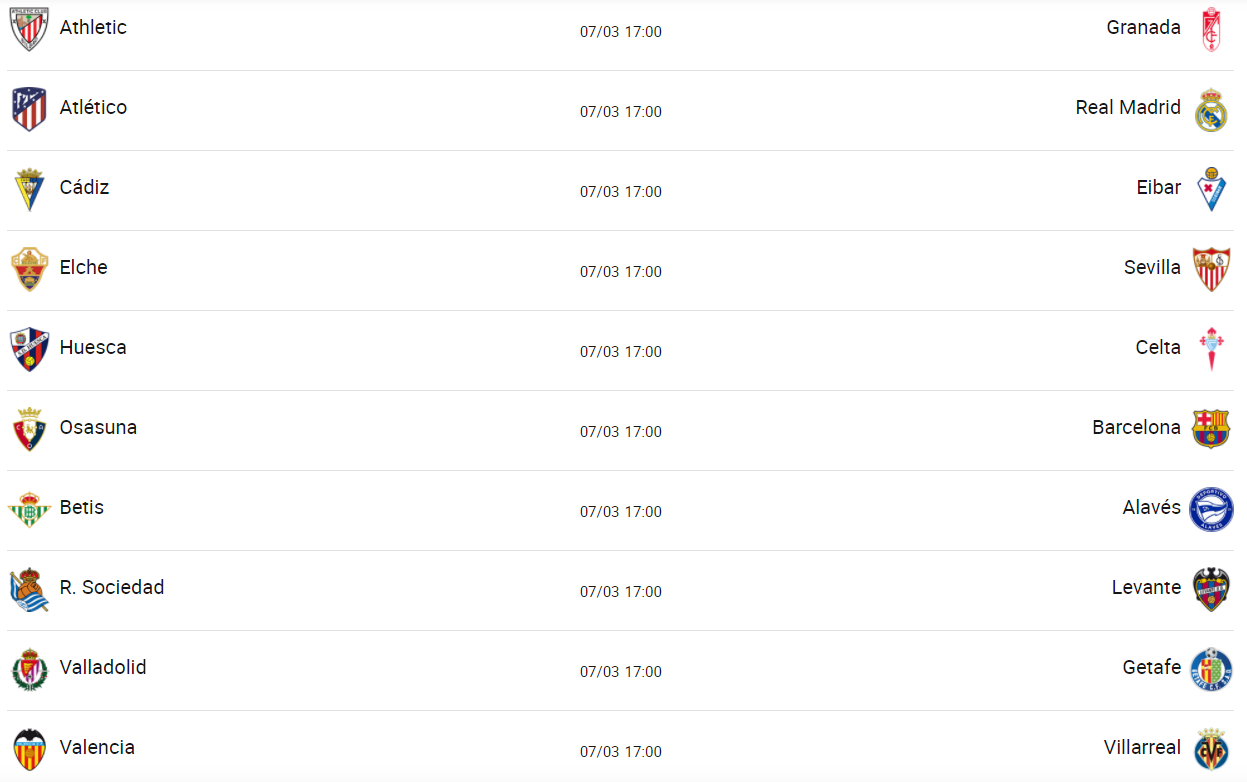

In [8]:
lista_jornada = ['athletic-granada','atlético-r.madrid','cádiz-eibar','elche-sevilla','huesca-celta','osasuna-barcelona','betis-alavés','r.sociedad-levante','valladolid-getafe','valencia-villarreal']

A continuación, se creará un diccionario con los respectivos partidos de la lista como claves y con la categoría del partido como valor para después ordenarlos por valor. Esto se debe a que se va a utilizar un **enfoque voraz**, ya que, como se puede observar con la matriz audiencia_partidos, los partidos con mayor audiencia son aquellos que presentan un equipo de categoría A al menos. Por ello es por lo que se ordena el diccionario ya que los partidos con mayor audiencia serán los que se coloquen primero. Además, como hay 10 franjas horarias, no se necesitará que se repitan partidos, sin reducir así los porcentajes de audiencia. 

In [17]:
def jornadaAudiencia(jornada_lista, diccionario_de_categorias, matriz_audiencia, data_resultado):
  diccionario_categoria_jornada = {}
  ## se recorre el diccionario de tal forma que para cada partido se asigne la categoría 
  for partido in jornada_lista:
    ## al ir asignando las categorías se va creando un nuevo diccionario con clave el partido y valor la categoría
    diccionario_categoria_jornada[partido.upper()] = categoriaPartido(partido, diccionario_de_categorias)
  ## ahora para aplicar el enfoque voraz se va a ordenar el diccionario por valores
  diccionario_jornada_ordenada = dict(sorted(diccionario_categoria_jornada.items(), key=operator.itemgetter(1), reverse=False))
  ## se crea una lista vacía donde se añadirán las categorías de los partidos en orden
  audiencia_cat = list()
  ## se recorren los valores del diccionario y se añaden a la lista
  for v in diccionario_jornada_ordenada.values():
    audiencia_cat.append(audienciaCategoriaPartido(v,audiencia_partidos))
  ## ahora se ordena el dataframe según la ponderación para ir añadiendo los partidos
  data_resultado = data_resultado.sort_values('Ponderación_audiencia',ascending=False)
  ## se añaden las columnas partidos, categorías de los partidos, audiencia por la categoría del partido y audiencia del partido (resultado de multiplicar audiencia_por_categoría
  ## y ponderación_audiencia)
  data_resultado['Ponderación_audiencia'] = pd.to_numeric(data_resultado['Ponderación_audiencia'], errors='coerce')
  data_resultado['Partidos'] = diccionario_jornada_ordenada.keys()
  data_resultado['Categorías'] = diccionario_jornada_ordenada.values()
  data_resultado['Audiencia_por_categoría'] = pd.to_numeric(audiencia_cat, errors='coerce')
  data_resultado['Audiencia_por_partido'] = data_resultado['Ponderación_audiencia']*data_resultado['Audiencia_por_categoría']
  return data_resultado


El siguiente paso será probar la función para los datos creados anteriormente. El resultado es un dataframe con los partidos ordenados según el mejor horario.

In [20]:
resultado = jornadaAudiencia(lista_jornada, diccionario_equipo_categoria, audiencia_partidos, dataframe_partidos)
resultado

,Ponderación_audiencia,Partidos,Categorías,Audiencia_por_categoría,Audiencia_por_partido
20h sábado,1.00,ATLÉTICO-R.MADRID,AA,2.00,2.0000
20h domingo,1.00,OSASUNA-BARCELONA,AB,1.30,1.3000
18h sábado,0.80,ELCHE-SEVILLA,AC,1.00,0.8000
16h domingo,0.75,ATHLETIC-GRANADA,BB,0.90,0.6750
16h sábado,0.70,VALENCIA-VILLARREAL,BB,0.90,0.6300
12h sábado,0.55,R.SOCIEDAD-LEVANTE,BC,0.75,0.4125
18h domingo,0.50,VALLADOLID-GETAFE,BC,0.75,0.3750
12h sábado,0.45,CÁDIZ-EIBAR,CC,0.47,0.2115
20h viernes,0.40,HUESCA-CELTA,CC,0.47,0.1880
20h lunes,0.40,BETIS-ALAVÉS,CC,0.47,0.1880


Por último, se va a calcular la audiencia total que se encargará de ver la jornada de la liga.

In [22]:
resultado['Audiencia_por_partido'].sum()

6.779999999999999

El resultado es de más de 6.7 millones de personas.
Para terminar la **complejidad** del algoritmo al no tener bucles anidados será de **O(n)**.
Además, la otra técnica con la que creo que se podría resolver este problema sería usando ramificación y poda, aunque no sé como enfocarlo bien, habiendo escogido por ello algoritmos voraces.